In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
bank = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';')

# Data Preprocessing :

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking for Duplicates:

In [9]:
duplicates = bank.duplicated()
duplicated_rows = bank[duplicates]
duplicated_rows.count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Checking for Missing Values :

In [10]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Dropping unnecessary columns

In [11]:
bank = bank.drop(['day', 'month'], axis=1)

In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


# EDA :

In [13]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### Distribution of the Age

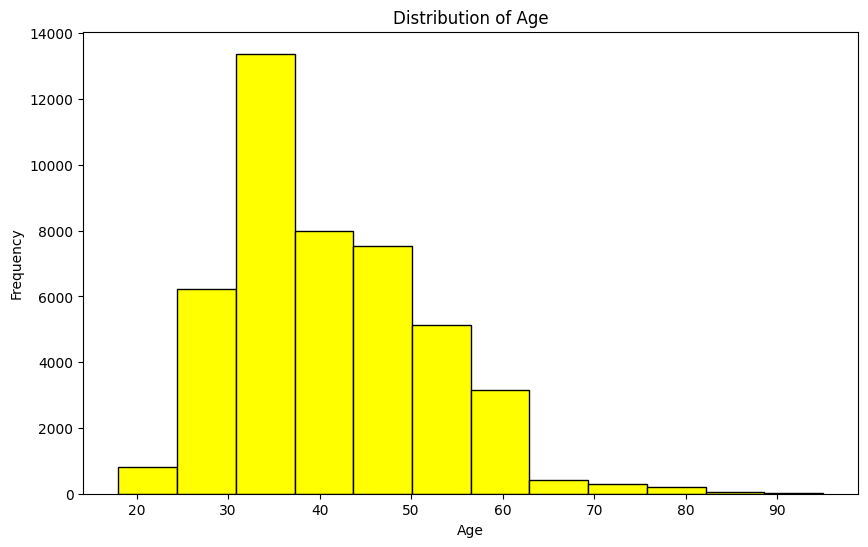

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(bank['age'], bins=12, color='yellow', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of Target Variable:

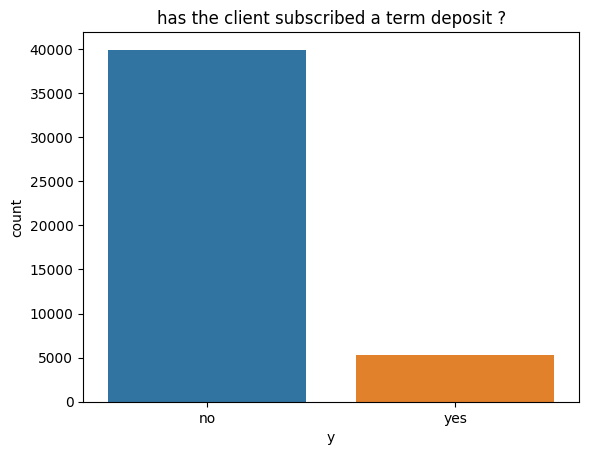

In [15]:
plt.title('has the client subscribed a term deposit ?')
sns.countplot(x='y', data=bank)
plt.show()

### Distribution of 'marital'

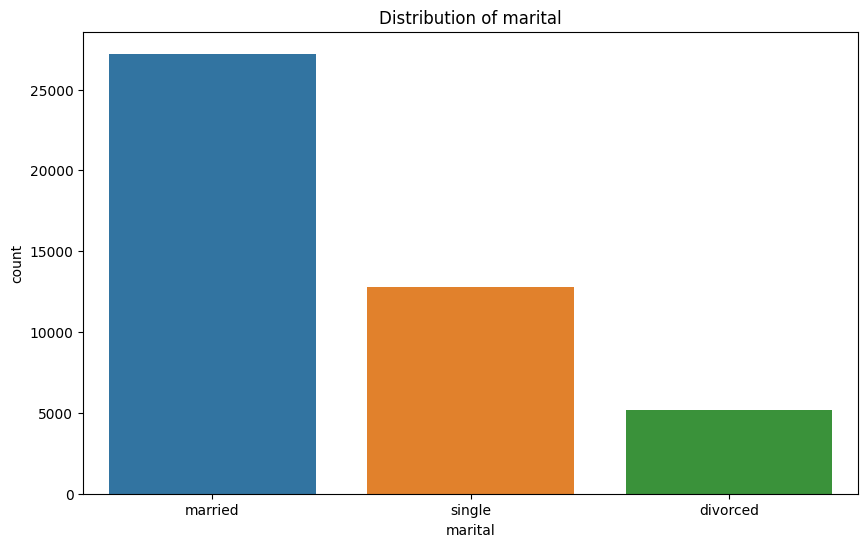

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=bank)
plt.title('Distribution of marital')
plt.show()

### Distribution of 'education'

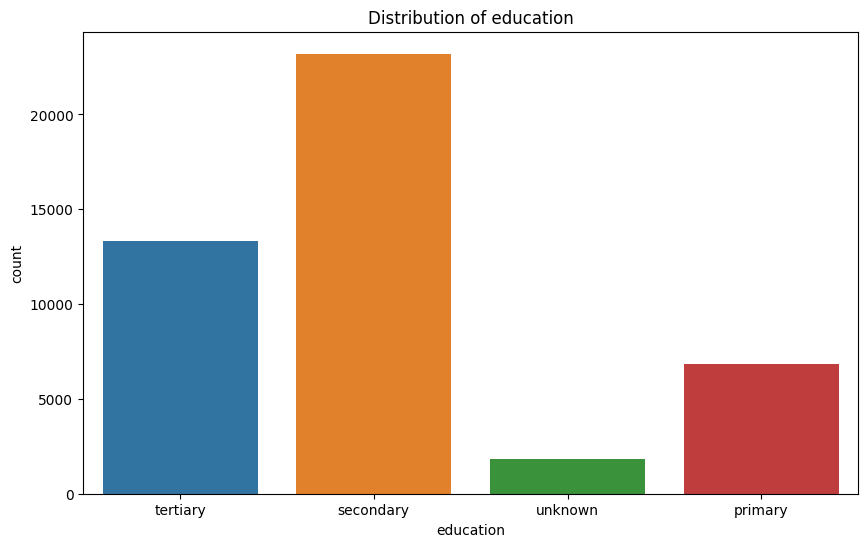

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=bank)
plt.title('Distribution of education')
plt.show()


### Distribution of 'housing'

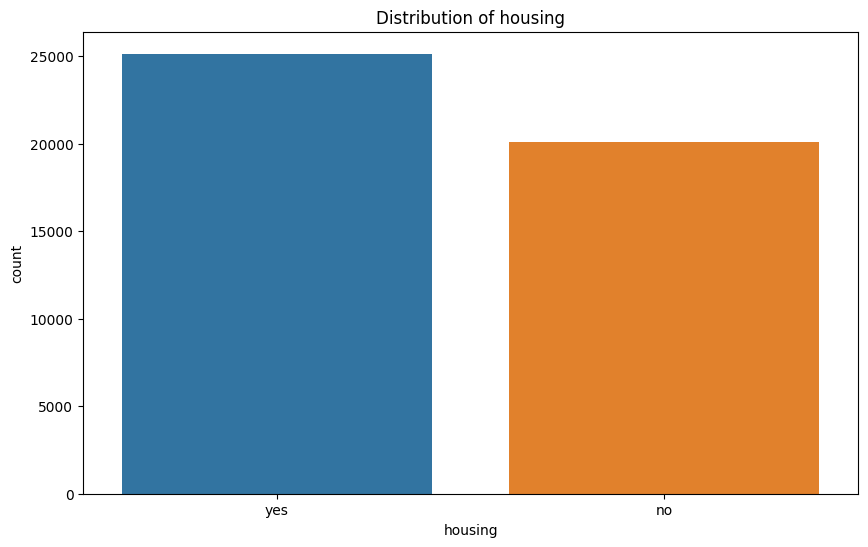

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=bank)
plt.title('Distribution of housing')
plt.show()

### Distribution of 'loan'

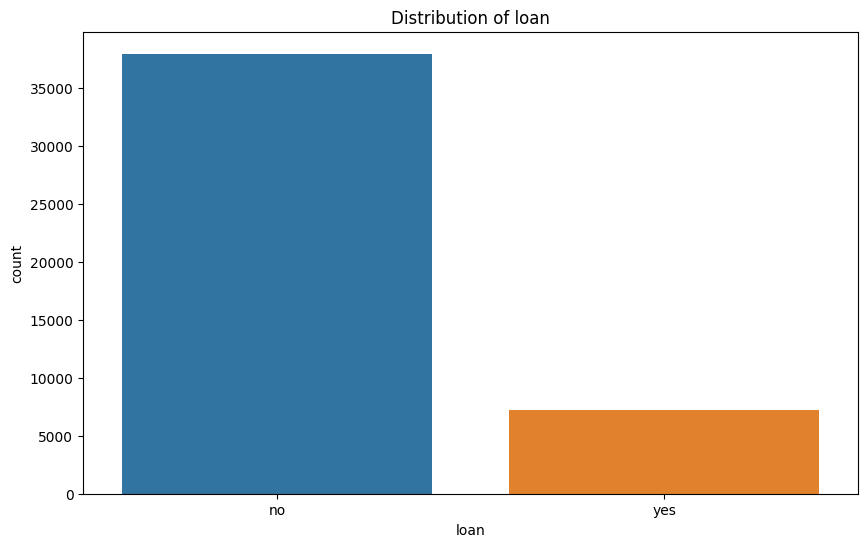

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', data=bank)
plt.title('Distribution of loan')
plt.show()


### Distribution of 'contact'

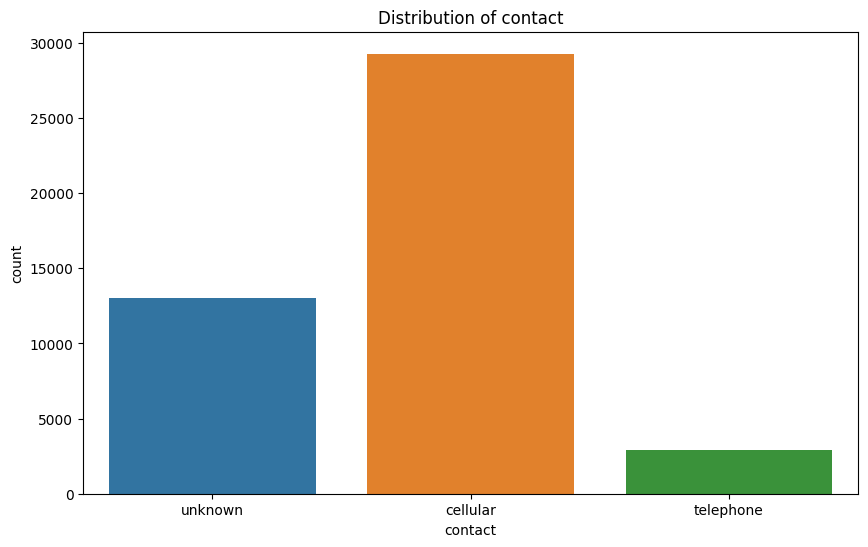

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', data=bank)
plt.title('Distribution of contact')
plt.show()


# Machine Learning :

In [21]:
# Assuming 'bank' is your DataFrame
X = bank.drop('y', axis=1)  # Features
y = bank['y']  # Target variable



### Encode categorical variables


In [ ]:
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'])

### Convert 'yes' and 'no' labels to 1 and 0

In [ ]:
y_binary = y.map({'yes': 1, 'no': 0})

### Decision Tree Classifier without Hyperparameter Tuning

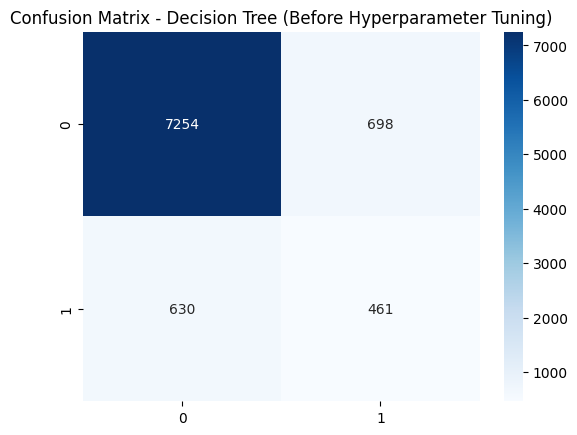

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Store evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Before Hyperparameter Tuning)')
plt.show()



### Hyperparameter Tuning using GridSearchCV

In [30]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


### Decision Tree Classifier with Best Hyperparameters

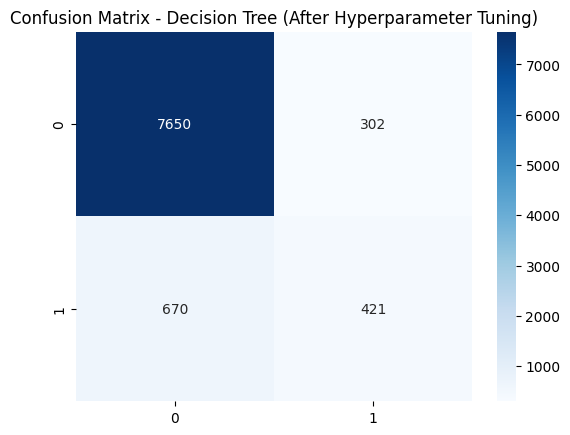

In [24]:
best_dt_classifier = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_dt_classifier.fit(X_train, y_train)
y_pred_best_dt = best_dt_classifier.predict(X_test)

# Store evaluation metrics for the decision tree classifier (with best hyperparameters)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)

# Display confusion matrix for the decision tree classifier (with best hyperparameters)
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (After Hyperparameter Tuning)')
plt.show()



### Comparing the evaluation metrics for both classifiers

In [28]:
results_table = PrettyTable()
results_table.field_names = ["Metric", "Decision Tree (Before Hyperparameter Tuning)", "Decision Tree (After Hyperparameter Tuning)"]
results_table.add_row(["Accuracy", f"{accuracy_dt:.2f}", f"{accuracy_best_dt:.2f}"])
results_table.add_row(["Precision", f"{precision_dt:.2f}", f"{precision_best_dt:.2f}"])
results_table.add_row(["Recall", f"{recall_dt:.2f}", f"{recall_best_dt:.2f}"])
results_table.add_row(["F1-Score", f"{f1_dt:.2f}", f"{f1_best_dt:.2f}"])

print(results_table)

+-----------+----------------------------------------------+---------------------------------------------+
|   Metric  | Decision Tree (Before Hyperparameter Tuning) | Decision Tree (After Hyperparameter Tuning) |
+-----------+----------------------------------------------+---------------------------------------------+
|  Accuracy |                     0.85                     |                     0.89                    |
| Precision |                     0.40                     |                     0.58                    |
|   Recall  |                     0.42                     |                     0.39                    |
|  F1-Score |                     0.41                     |                     0.46                    |
+-----------+----------------------------------------------+---------------------------------------------+
